In [1]:
pip install notebook

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Instalar yfinance si no está instalado
!pip install yfinance

In [3]:
import yfinance as yf

# Crear un objeto para el ticker de Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extraer el historial de datos de Tesla con la mayor cantidad de tiempo posible
tesla_data = tesla.history(period="max")

# Restablecer el índice para hacer 'Date' una columna normal
tesla_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas del DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [4]:
!pip install requests beautifulsoup4

In [10]:
!pip install selenium
!pip install webdriver-manager

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ------- -------------------------------- 1.8/9.7 MB 16.9 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.7 MB 14.3 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.7 MB 15.4 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 13.7 MB/s eta 0:00:00


In [11]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd

# Configurar Selenium con Chrome
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# URL de la página con los ingresos de Tesla
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
driver.get(url)

# Esperar a que la página cargue (ajusta el tiempo si es necesario)
driver.implicitly_wait(10)

# Extraer el HTML completo
html = driver.page_source

# Cerrar el navegador
driver.quit()

# Parsear el HTML con BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Encontrar la tabla de ingresos
table = soup.find("table", {"class": "historical_data_table table"})

# Convertir la tabla en un DataFrame
tesla_revenue = pd.read_html(str(table))[0]

# Renombrar las columnas para mayor claridad
tesla_revenue.columns = ["Date", "Revenue"]

# Eliminar filas con valores nulos
tesla_revenue = tesla_revenue.dropna()

# Mostrar las primeras filas del DataFrame
print(tesla_revenue.head())

   Date  Revenue
0  2023  $96,773
1  2022  $81,462
2  2021  $53,823
3  2020  $31,536
4  2019  $24,578


C:\Users\cafef\AppData\Local\Temp\ipykernel_31372\3319362553.py:31: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


In [12]:
# Importar la biblioteca yfinance y pandas
import yfinance as yf
import pandas as pd

# Crear un objeto Ticker para GameStop (GME)
gme = yf.Ticker("GME")

# Extraer el historial de datos de GameStop con la mayor cantidad de tiempo posible
gme_data = gme.history(period="max")

# Restablecer el índice para hacer 'Date' una columna normal
gme_data.reset_index(inplace=True)

# Mostrar las primeras filas del DataFrame
print("Primeras 5 filas de los datos de GameStop:")
print(gme_data.head())

# Guardar los datos en un archivo CSV (opcional)
gme_data.to_csv("gamestop_stock_data.csv", index=False)

Primeras 5 filas de los datos de GameStop:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [14]:
pip install selenium webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [15]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# Configurar el navegador Chrome
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# URL de la página de GameStop Revenue
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Cargar la página con Selenium
driver.get(url)
time.sleep(5)  # Esperar a que la página se cargue completamente

# Extraer el HTML después de cargar JavaScript
html_data = driver.page_source
driver.quit()  # Cerrar el navegador

# Parsear el HTML con BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Buscar la tabla que contiene los datos de ingresos
tables = soup.find_all("table")
print(f"Número de tablas encontradas: {len(tables)}")

# Buscar la tabla que contiene "GameStop Quarterly Revenue"
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue_table = table
        break

# Convertir la tabla HTML a un DataFrame de pandas
gme_revenue = pd.read_html(str(gme_revenue_table))[0]

# Limpiar los nombres de las columnas
gme_revenue.columns = ["Date", "Revenue"]

# Eliminar filas con valores faltantes o irrelevantes
gme_revenue = gme_revenue.dropna()
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Mostrar las primeras filas del DataFrame
print("Datos de ingresos de GameStop:")
print(gme_revenue.head())

# Guardar los datos en un archivo CSV (opcional)
gme_revenue.to_csv("gamestop_revenue_data.csv", index=False)

Número de tablas encontradas: 6
Datos de ingresos de GameStop:
         Date Revenue
0  2024-07-31    $798
1  2024-04-30    $882
2  2024-01-31  $1,794
3  2023-10-31  $1,078
4  2023-07-31  $1,164


C:\Users\cafef\AppData\Local\Temp\ipykernel_31372\2659736092.py:37: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(gme_revenue_table))[0]


In [16]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [17]:
tesla_revenue.head()

,Date,Revenue
0,2023,"$96,773"
1,2022,"$81,462"
2,2021,"$53,823"
3,2020,"$31,536"
4,2019,"$24,578"


In [19]:
# Convertir las columnas Date a formato datetime
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Limpiar Revenue: eliminar comas, "$" y "B" para billones, y convertir a float
tesla_revenue["Revenue"] = (
    tesla_revenue["Revenue"]
    .str.replace(r'[$B,]', '', regex=True)  # Eliminar "$", "B" y comas
    .astype(float) * 1e9  # Convertir a billones
)

# Verificar el resultado
print(tesla_revenue.head())

                           Date       Revenue
0 1970-01-01 00:00:00.000002023  9.677300e+13
1 1970-01-01 00:00:00.000002022  8.146200e+13
2 1970-01-01 00:00:00.000002021  5.382300e+13
3 1970-01-01 00:00:00.000002020  3.153600e+13
4 1970-01-01 00:00:00.000002019  2.457800e+13


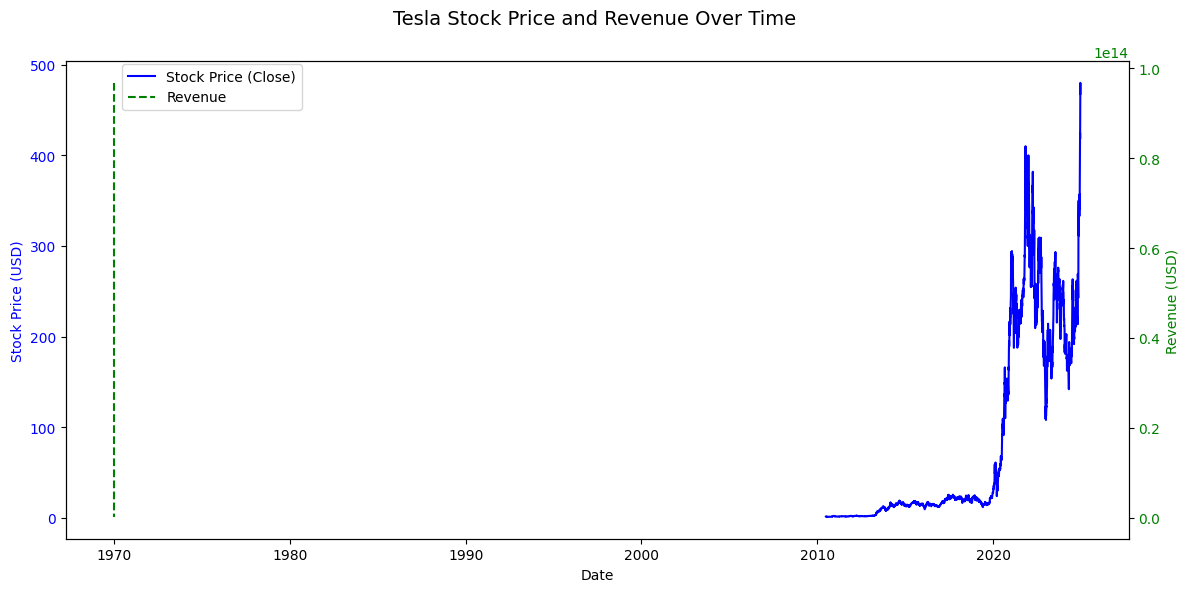

In [20]:
import matplotlib.pyplot as plt

# Crear la figura y el eje
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de precios de acciones (Close Price)
ax1.plot(tesla_data["Date"], tesla_data["Close"], color="blue", label="Stock Price (Close)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Crear un segundo eje Y para los ingresos
ax2 = ax1.twinx()
ax2.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], color="green", linestyle="--", label="Revenue")
ax2.set_ylabel("Revenue (USD)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Títulos y leyenda
fig.suptitle("Tesla Stock Price and Revenue Over Time", fontsize=14)
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Mostrar el gráfico
plt.show()

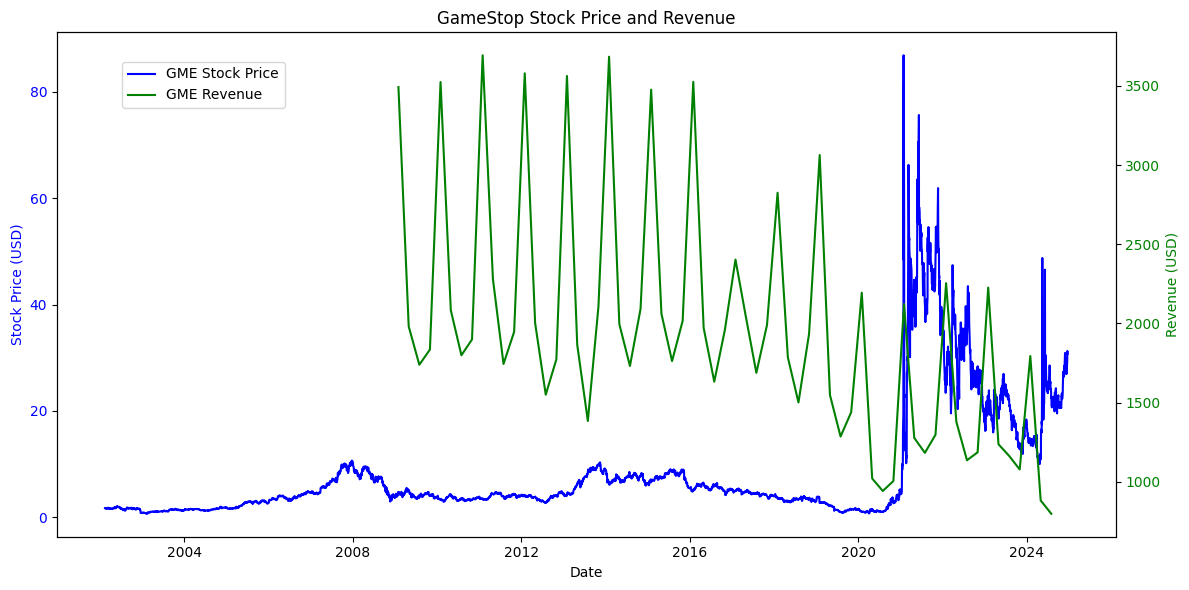

In [21]:
# Extraer los datos de GameStop usando yfinance
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Extraer los datos de ingresos de GameStop
gme_revenue = pd.read_csv("gamestop_revenue_data.csv")  # Archivo generado en la pregunta anterior

# Convertir las columnas "Date" a formato datetime
gme_data["Date"] = pd.to_datetime(gme_data["Date"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Limpiar y preparar la columna "Revenue"
gme_revenue["Revenue"] = (
    gme_revenue["Revenue"]
    .str.replace(r'[$,]', '', regex=True)  # Eliminar símbolos "$" y comas ","
    .astype(float)
)

# Crear el dashboard
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico del precio de las acciones
ax1.plot(gme_data["Date"], gme_data["Close"], color="blue", label="GME Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Crear un segundo eje Y para los ingresos
ax2 = ax1.twinx()
ax2.plot(gme_revenue["Date"], gme_revenue["Revenue"], color="green", label="GME Revenue")
ax2.set_ylabel("Revenue (USD)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Agregar título y leyendas
plt.title("GameStop Stock Price and Revenue")
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()